In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
test_read = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_read.head()

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
test_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

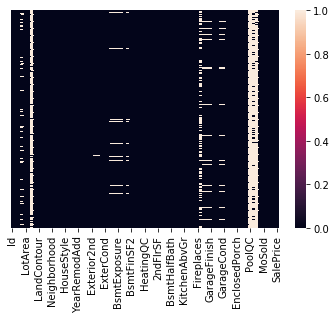

In [9]:
#visualise null values
sns.heatmap(df.isnull(), yticklabels=False, cbar='False')

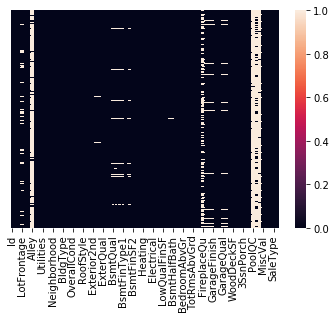

In [11]:
sns.heatmap(test_read.isnull(), yticklabels=False, cbar='False')

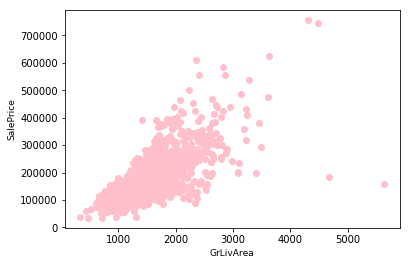

In [12]:
#outlier removal
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'], c='pink')
plt.ylabel('SalePrice', fontsize=9)
plt.xlabel('GrLivArea', fontsize=9)
plt.show()

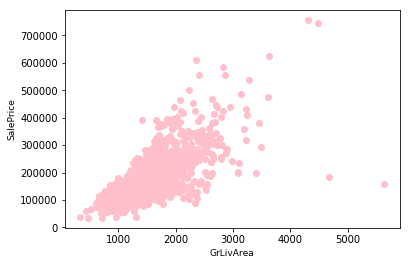

In [13]:
#df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'], c='pink')
plt.ylabel('SalePrice', fontsize=9)
plt.xlabel('GrLivArea', fontsize=9)
plt.show()

In [14]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['GrLivArea'].fillna(df['GrLivArea'].mean(), inplace=True)
df['SalePrice'].fillna(df['SalePrice'].mean(), inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'Id'], axis=1, inplace=True) #drop, too many null values

In [16]:
#repeat for test_df
test_read['LotFrontage'].fillna(test_read['LotFrontage'].mean(), inplace=True)
test_read['MasVnrType'].fillna(test_read['MasVnrType'].mode()[0], inplace=True)
test_read['MasVnrArea'].fillna(test_read['MasVnrArea'].mean(), inplace=True)
test_read['BsmtQual'].fillna(test_read['BsmtQual'].mode()[0], inplace=True)
test_read['BsmtCond'].fillna(test_read['BsmtCond'].mode()[0], inplace=True)
test_read['BsmtExposure'].fillna(test_read['BsmtExposure'].mode()[0], inplace=True)
test_read['BsmtFinType1'].fillna(test_read['BsmtFinType1'].mode()[0], inplace=True)
test_read['BsmtFinType2'].fillna(test_read['BsmtFinType2'].mode()[0], inplace=True)
test_read['Electrical'].fillna(test_read['Electrical'].mode()[0], inplace=True)
test_read['GarageType'].fillna(test_read['GarageType'].mode()[0], inplace=True)
test_read['GarageYrBlt'].fillna(test_read['GarageYrBlt'].mode()[0], inplace=True)
test_read['GarageFinish'].fillna(test_read['GarageFinish'].mode()[0], inplace=True)
test_read['GarageQual'].fillna(test_read['GarageQual'].mode()[0], inplace=True)
test_read['GarageCond'].fillna(test_read['GarageCond'].mode()[0], inplace=True)
test_read['MSZoning'].fillna(test_read['MSZoning'].mode()[0], inplace=True)
test_read['Utilities'].fillna(test_read['Utilities'].mode()[0], inplace=True)
test_read['Exterior1st'].fillna(test_read['Exterior1st'].mode()[0], inplace=True)
test_read['Exterior2nd'].fillna(test_read['Exterior2nd'].mode()[0], inplace=True)
test_read['BsmtFinSF1'].fillna(test_read['BsmtFinSF1'].mean(), inplace=True)
test_read['BsmtFinSF2'].fillna(test_read['BsmtFinSF2'].mean(), inplace=True)
test_read['BsmtUnfSF'].fillna(test_read['BsmtUnfSF'].mean(), inplace=True)
test_read['TotalBsmtSF'].fillna(test_read['TotalBsmtSF'].mean(), inplace=True)
test_read['BsmtFullBath'].fillna(test_read['BsmtFullBath'].mean(), inplace=True)
test_read['BsmtHalfBath'].fillna(test_read['BsmtHalfBath'].mean(), inplace=True)
test_read['KitchenQual'].fillna(test_read['KitchenQual'].mode()[0], inplace=True)
test_read['GarageCars'].fillna(test_read['GarageCars'].mean(), inplace=True)
test_read['Functional'].fillna(test_read['Functional'].mode()[0], inplace=True)
test_read['GarageArea'].fillna(test_read['GarageArea'].mean(), inplace=True)
test_read['SaleType'].fillna(test_read['SaleType'].mode()[0], inplace=True)
test_read.drop(['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'Id'], axis=1, inplace=True) #drop, too many null values

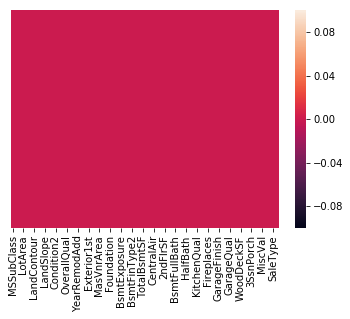

In [18]:
sns.heatmap(test_read.isnull(), yticklabels=False, cbar='False')

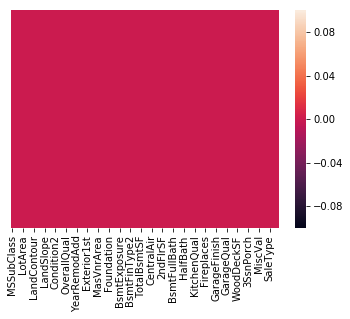

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar='False')

In [20]:
#columns with categorical values
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
         'SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual',
         'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
         'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',    
         'CentralAir', 'Electrical','KitchenQual','Functional','GarageType',
         'GarageFinish','GarageQual','GarageCond','PavedDrive','LandSlope','Neighborhood']

len(columns)

38

In [22]:
df.shape

(1460, 75)

In [23]:
final_df = pd.concat([df,test_read],axis=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [24]:
final_df.shape

(2919, 75)

In [25]:
final_df = pd.get_dummies(final_df, columns=columns, drop_first=True)
final_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,0,0,1
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,0,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,0,0,0,0,0,0,0,0
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,0,0,0,0,0,0,0,0
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
final_df.shape

(2919, 233)

In [27]:
#drop duplicates
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [28]:
final_df.drop_duplicates(inplace=True)

In [29]:
final_df.shape

(2919, 233)

In [30]:
df=final_df.iloc[:1460,:]
test_df=final_df.iloc[1460:,:]
test_df.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
test_df.shape

(1459, 232)

In [32]:
df.shape

(1460, 233)

In [33]:
#correlation matrix
corrmat = df.corr()
corrmat

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1stFlrSF,1.000000,-0.202646,0.056104,0.127401,0.445863,0.097117,0.244671,0.001956,0.317987,-0.065292,...,0.159314,0.254693,-0.143652,-0.040461,-0.029462,0.017929,-0.018495,0.131731,0.127348,0.056059
2ndFlrSF,-0.202646,1.000000,-0.024358,0.502901,-0.137079,-0.099260,-0.169494,-0.023855,0.004469,0.061989,...,0.248141,-0.005846,0.093691,0.090162,-0.129839,0.024282,0.064675,-0.004910,-0.022967,-0.043652
3SsnPorch,0.056104,-0.024358,1.000000,-0.024478,0.026451,-0.029993,-0.000106,0.035114,0.020764,-0.037305,...,-0.019775,0.004335,-0.021452,-0.015356,-0.026882,0.027633,-0.029106,0.014909,-0.019018,-0.010137
BedroomAbvGr,0.127401,0.502901,-0.024478,1.000000,-0.107355,-0.015728,-0.150673,0.046519,0.166643,0.041570,...,0.134600,-0.047782,-0.018568,0.144626,0.018699,0.016549,-0.058909,-0.088443,0.010948,-0.073146
BsmtFinSF1,0.445863,-0.137079,0.026451,-0.107355,1.000000,-0.050117,0.649212,0.067418,-0.495251,-0.102303,...,0.143949,0.131004,-0.177889,-0.068065,0.032863,0.044973,-0.063893,0.109798,0.094962,0.071904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Neighborhood_SawyerW,0.017929,0.024282,0.027633,0.016549,0.044973,0.026822,0.053003,-0.005749,-0.070106,-0.027798,...,-0.034883,-0.048422,-0.059438,-0.027086,-0.047418,1.000000,-0.051341,-0.027086,-0.033547,-0.017880
Neighborhood_Somerst,-0.018495,0.064675,-0.029106,-0.058909,-0.063893,-0.072216,-0.053722,-0.060309,0.135145,-0.089897,...,-0.042526,-0.059032,-0.072462,-0.033022,-0.057808,-0.051341,1.000000,-0.033022,-0.040898,-0.021798
Neighborhood_StoneBr,0.131731,-0.004910,0.014909,-0.088443,0.109798,0.011566,0.085153,-0.031818,0.021562,0.008568,...,-0.022436,-0.031144,-0.038230,-0.017422,-0.030498,-0.027086,-0.033022,1.000000,-0.021577,-0.011500
Neighborhood_Timber,0.127348,-0.022967,-0.019018,0.010948,0.094962,0.014248,0.073286,-0.003358,0.006728,-0.031069,...,-0.027787,-0.038572,-0.047348,-0.021577,-0.037773,-0.033547,-0.040898,-0.021577,1.000000,-0.014243


In [50]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,0,0,1
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,0,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,1,0,0,0,0,0,0,0,0,0


In [52]:
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

#log transform
y= np.log1p(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)                                                

In [53]:
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [54]:
def print_results(results):
    print('BEST PARAMS: {}\\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9437581096741338

In [56]:
#feature scaling for ridge
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_scaled = sc.transform(X_train)

In [57]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_train)
ridge.score(X_scaled, y_train)

0.943613105267323

In [59]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
print(xgb_reg.score(X_train, y_train))

y_pred=xgb_reg.predict(test_df)
y_pred

[00:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9527212394640657


array([11.718226, 11.949062, 12.101015, ..., 12.006016, 11.766706,
       12.349823], dtype=float32)

In [60]:
y_pred[y_pred<0] = 0
y_pred = np.expm1(y_pred)
y_pred

array([122788.45, 154671.05, 180053.53, ..., 163735.84, 128887.95,
       230918.17], dtype=float32)

In [ ]:
#make submission df
prediction = pd.DataFrame(y_pred)
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
prediction_df = pd.concat([submission['Id'], prediction], axis=1)
prediction_df.columns=['Id','SalePrice']
prediction_df.to_csv('sample_submission.csv',index=False)